In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [47]:
def world_of_mary():
    DG = nx.DiGraph()
    #DG.add_nodes_from(('Mary', 'Tom','Joe', 'potato', 'putine', 'cheese'))
    DG.add_edges_from([('Joe','Mary'), 
                       ('Tom','Mary'), 
                       ('poutine', 'cheese'), 
                       ('poutine', 'gravy'), 
                       ('potato', 'veg'),
                       ('poutine', 'potato'),
                       ('Tom', 'potato'),
                       ('gravy', 'meat'),
                       ('Tom', 'vegtrn'),
                       ('Tom', 'cheese'),
                       ('Mary', 'cheese'),
                       ('Joe', 'cheese'),
                       ('amazon', 'workplace'),
                       ('Tom', 'amazon'),
                       ('Joe', 'Amazon'),
                       ('Tom', 'Joe'),
                       ('Mary', 'amazon'),
                       ('Mary', 'Tom'),
                       ('Mary', 'vegtrn')], length=8)
    edge_labels = {('Joe','Mary'): 'loves',
                   ('Tom', 'Mary'):'sibling',
                   #('Mary', 'Tom'):'sibling',
                   ('poutine', 'cheese'):'contains', 
                   ('poutine', 'gravy'):'contains', 
                   ('potato', 'veg'):'is',
                   ('poutine', 'potato'): 'contains',
                   ('Tom', 'potato'): 'likes',
                   ('Tom', 'cheese'): 'likes',
                   ('Joe', 'cheese'): 'likes',
                   ('Mary', 'cheese'): 'likes',
                   ('gravy', 'meat'): 'contains',
                   ('Tom', 'vegtrn'): 'is',
                   ('amazon', 'workplace'): 'is',
                   ('Tom', 'amazon'): 'works',
                   ('Joe', 'amazon'): 'works',
                   ('Mary', 'amazon'): 'works',
                   ('Tom', 'Joe'): 'friends',
                   ('Tom', 'Joe'): 'colleagues',
                   ('Mary', 'vegtrn'):'is'}
    #labels={node:node for node in DG.nodes()}
    return DG, edge_labels
def draw_world_of_mary(graph=None,
                       edge_labels=None,
                       pos=None,
                       edge_color='black',
                       width=1,
                       linewidths=1, 
                       node_size=3500,
                       node_color='black',
                       alpha=0.9, 
                       font_color='w',
                       font_size=16,
                       fig_size=(20,20),
                       length=17,
                       edge_label_font_color='red',
                       title=None):
    '''
    takes a graph and edge labels and draws a diagram. You need to pass edge labels 
    if you are passing a graph parameters.
    For smaller subgraphs pass nx.circular_layout for pos.
    '''
    if graph==None:
        DG, edge_labels = world_of_mary()
    else:
        DG = graph
    if pos==None:
        pos = nx.spring_layout(DG)
    else:
        pos=pos
    plt.figure(figsize=fig_size)
    nx.draw(DG, 
            pos=pos, 
            edge_color=edge_color,
            width=width,
            linewidths=linewidths,
            node_size=node_size,
            node_color=node_color,
            alpha=alpha, 
            font_color=font_color, 
            font_size=font_size,
            labels={node:node for node in DG.nodes()})
    
    nx.draw_networkx_edge_labels(DG, 
                                 pos, 
                                 edge_labels=edge_labels,
                                 font_color=edge_label_font_color, 
                                 font_size=font_size, 
                                 length=17)
    plt.axis('off')
    plt.show()

1: [('Joe', 'Mary'), ('Joe', 'cheese'), ('Joe', 'Amazon'), ('Mary', 'cheese'), ('Mary', 'amazon'), ('Mary', 'Tom'), ('Mary', 'vegtrn'), ('Tom', 'Mary'), ('Tom', 'potato'), ('Tom', 'vegtrn'), ('Tom', 'cheese'), ('Tom', 'amazon'), ('Tom', 'Joe'), ('poutine', 'cheese'), ('poutine', 'gravy'), ('poutine', 'potato'), ('gravy', 'meat'), ('potato', 'veg'), ('amazon', 'workplace')]
['Joe', 'Mary', 'Tom', 'poutine', 'cheese', 'gravy', 'potato', 'veg', 'meat', 'vegtrn', 'amazon', 'workplace', 'Amazon']
2: [('Tom', 'Mary'), ('Tom', 'vegtrn'), ('Tom', 'cheese'), ('Tom', 'amazon'), ('Mary', 'cheese'), ('Mary', 'amazon'), ('Mary', 'Tom'), ('Mary', 'vegtrn')]
['vegtrn', 'Tom', 'Mary', 'amazon', 'cheese']


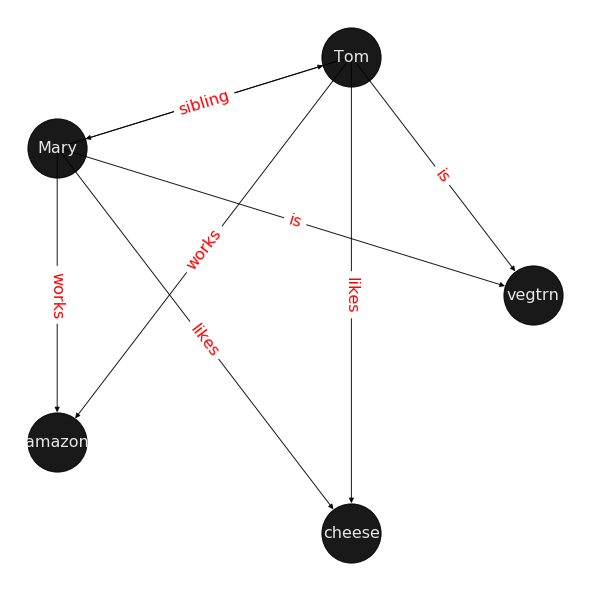

In [48]:
def get_ego(node='Tom', radius=1):
    g, l = world_of_mary()
    print("1: {}\n{}".format(g.edges, g.nodes))
    g = nx.ego_graph(g, n=node, radius=radius)
    print("2: {}\n{}".format(g.edges, g.nodes))
    a = dict()
    keys = l.keys()
    for key in keys:
        if key in g.edges():
            a[key] = l[key]
    return g, a
g,a=get_ego(node='Mary', radius=1)
draw_world_of_mary(g,a, fig_size=(8,8), length=10, pos=nx.circular_layout(g))

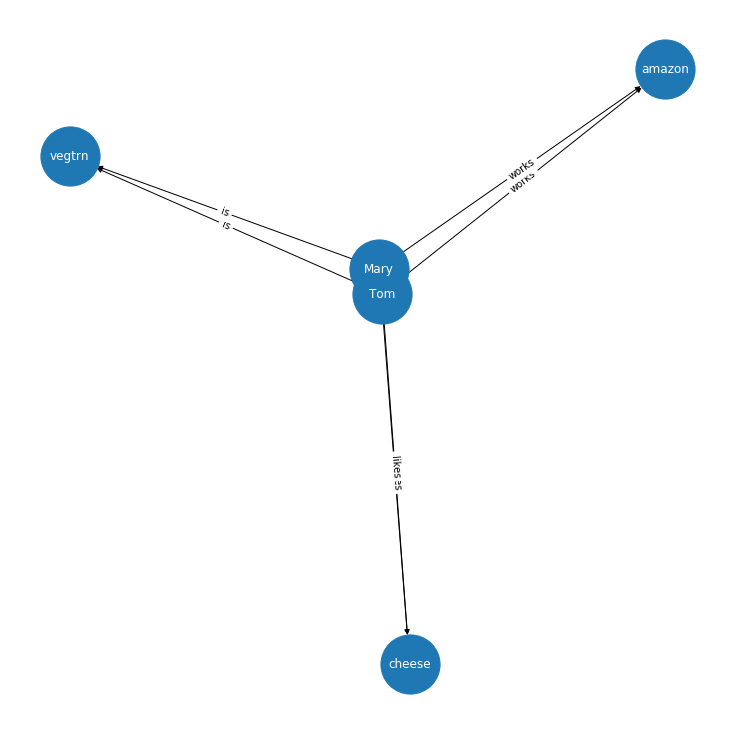

In [33]:
pos=nx.spring_layout(g)
plt.figure(figsize=(10, 10))
nx.draw(g, 
        with_labels=True, 
        pos=pos, 
        node_size=3500,
        font_color='w')
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=a, length=17)
plt.show()

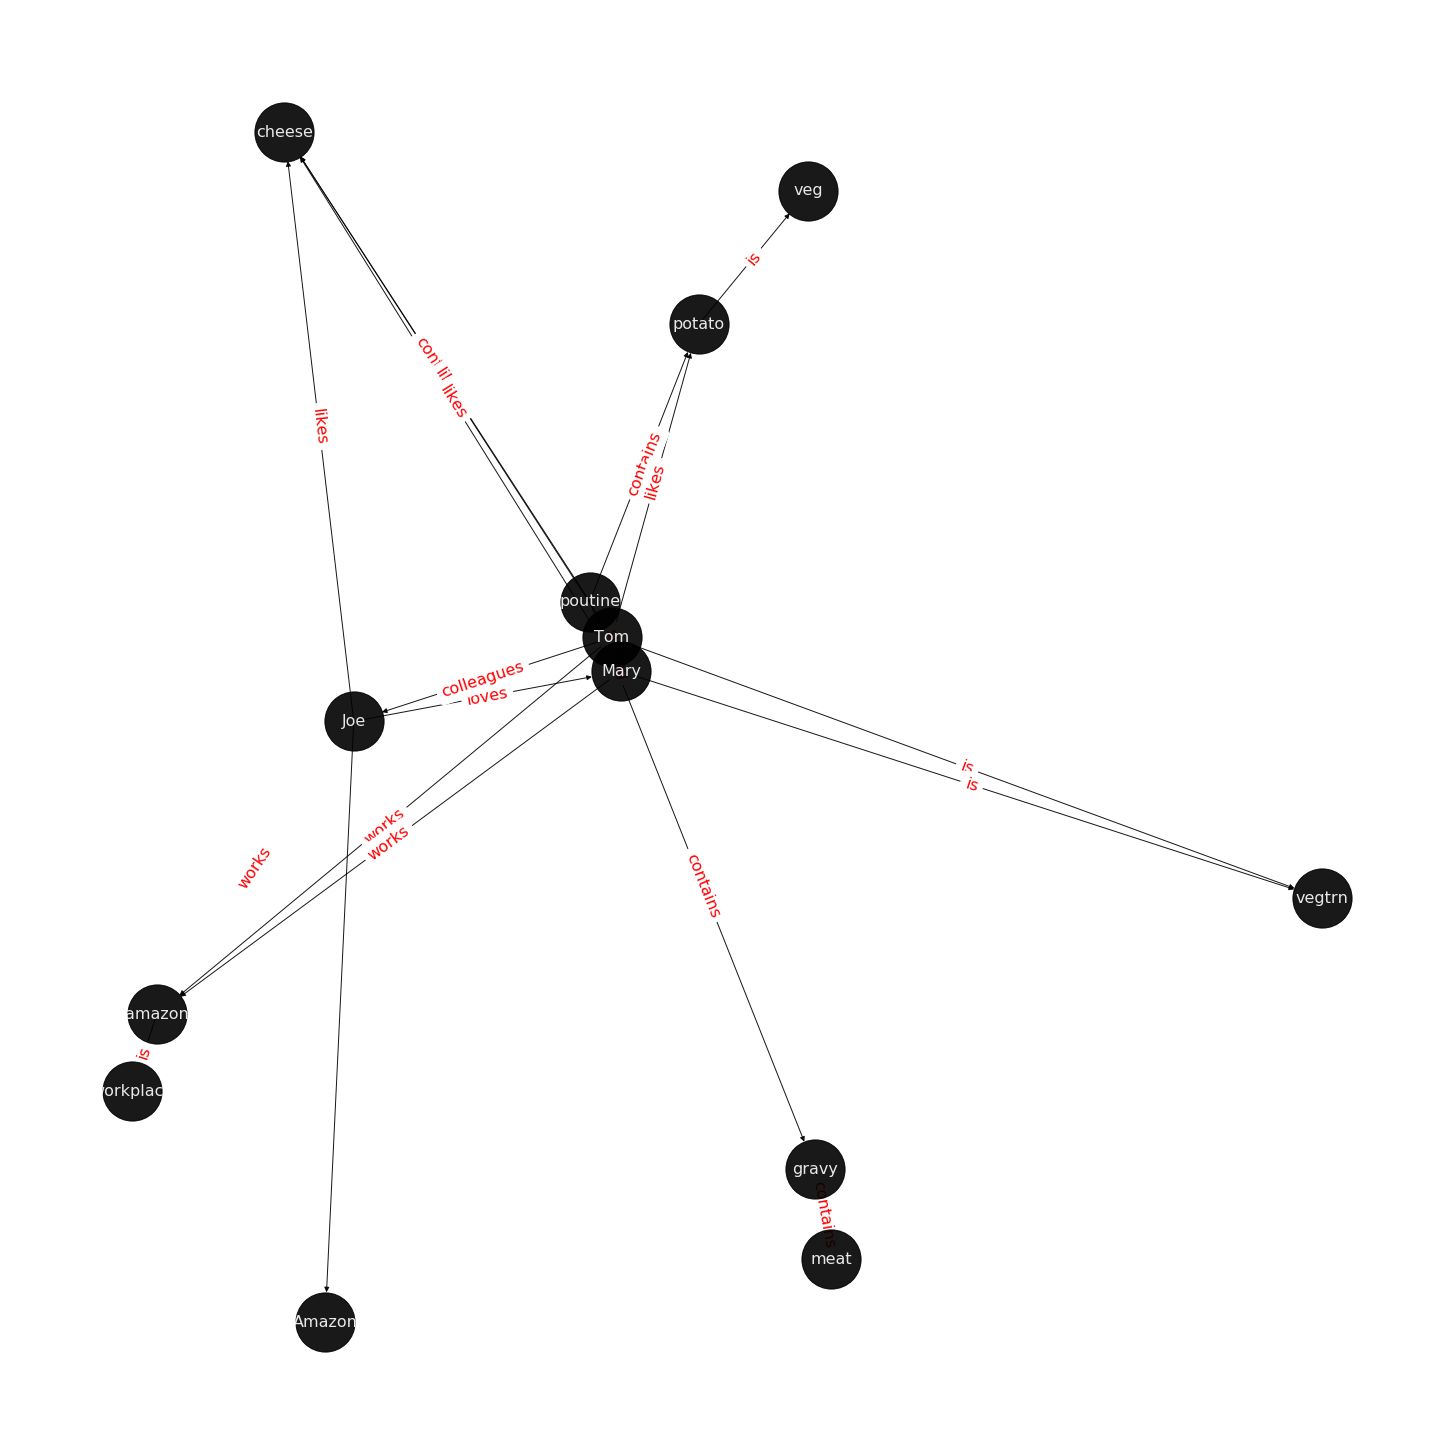

In [34]:
draw_world_of_mary()

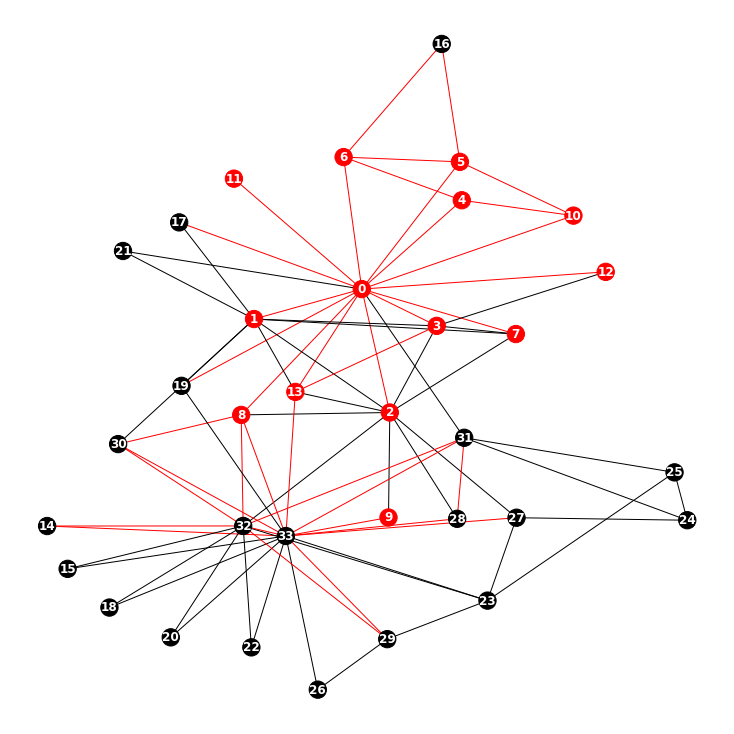

In [25]:
def draw_interaction_graph(G=nx.karate_club_graph(), 
                           pos=None, 
                           first_color='red',
                           second_color='black', 
                           font_color='w'):
    color_map = [second_color for i in range(G.number_of_nodes())]
    color_map[0:14] = [first_color for i in range(14)]
    fig = plt.figure(figsize=(10,10))
    pos = nx.circular_layout(G) if pos=='c' else nx.kamada_kawai_layout(G)
    nx.draw(G, 
            with_labels=True, 
            pos=pos, 
            node_color=color_map, 
            font_color=font_color, 
            font_weight='bold', 
            edge_color=color_map)
    plt.show()
    return

draw_interaction_graph()

In [7]:
age=15
print('kid' if age < 13 else 'teenager' if age < 18 else 'adult')

teenager


In [8]:
desc = nx.kamada_kawai_layout(G) if age < 13 else 'teenager' if age < 18 else 'adult'
desc

'teenager'

In [12]:
G=nx.path_graph(3)